<a href="https://colab.research.google.com/github/RogerA11/Streamlit-based-Recommender-System/blob/main/2.%20Base%20Notebook/Copy_of_CBB5_Movie_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<font size="8"> **Movie Recommendation 2022**</font>

© Explore Data Science Academy
** **
<br />

<img src="https://explore-datascience.net/images/images_admissions2/main-logo.jpg" width=600 height=100 />

<br />

** **

### Team Members



*   List item
*   List item
*   List item
*   List item
*   List item
*   List item



### Honour Code

We Team Cbb5, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


### Predict Overview:
In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing. See figure below adapted from [Kaggle](https://www.kaggle.com/competitions/edsa-movie-recommendation-2022/overview).

<br />

<center> <img src="https://research.aimultiple.com/wp-content/uploads/2017/08/recommendation-system.png" width=600 height=500 />

<br />



<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Understand the Data</a>

<a href=#four>4. Clean Data (EDA)</a>

<a href=#five>5. Data Preprocessing (EDA)</a> 

<a href=#six>6. Exploratory Data Analysis (EDA)</a>

<a href=#seven>7. Data Engineering</a>

<a href=#eight>8. Model creation </a>

<a href=#nine>9. Model Improvements</a>

<a href=#ten>10. Model Evaluation</a>

<a href=#eleven>11. Discuss chosen methods logic</a>

<a href=#twelve>12. Conclusions</a>

<a href=#thirteen>13. Recommendations</a>




 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [ ]:
# data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")


## COMET

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---



<br />

<img src="https://miro.medium.com/max/1400/1*5qQEAEAZsCoOpptAeN4RBA.png" width=500 height=200 />

<br />

convenient way to import data from Kaggle directly to Google Colab notebook.


let’s install the Kaggle package that will be used for importing the data.

In [ ]:
 !pip install -q kaggle

Then, save the json file with your credentials on your computer and upload this file to Colab using the code below:

In [ ]:
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [ ]:
#Create a Kaggle directory
! mkdir ~/.kaggle 

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# copy the jason file to kaggle folder
! cp kaggle.json ~/.kaggle/

In [ ]:
# Permissions for the jason file to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 # To list all the dataset in kaggle
 ! kaggle datasets list

ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                           Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23          15324        447  1.0              
ruchi798/data-science-job-salaries                                 Data Science Job Salaries                             7KB  2022-06-15 08:59:12           3970        141  1.0              
zusmani/petrolgas-prices-worldwide                                 Petrol/Gas Prices Worldwide                          10KB  2022-06-24 01:25:33           1851         89  1.0              
imoore/age-dataset                           

Download Data

In [ ]:
!kaggle competitions download -c edsa-movie-recommendation-2022

edsa-movie-recommendation-2022.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Now we have to unzip the file 
!unzip edsa-movie-recommendation-2022.zip

Archive:  edsa-movie-recommendation-2022.zip
replace genome_scores.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# import dataset
genome_score = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('genome_tags.csv')
imdb_data = pd.read_csv('imdb_data.csv')
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')


<a id="three"></a>
# 3. Understand the Data

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="four"></a>
# 4. Cleaning Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [ ]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Dataframe obviously has a relation between all the explored datasets as it have 'movieId' column in all the datasets. It was important to have such relation so that we would be able to concatenate the datasets. We can do so for train, movies and imdb_data dataframes before we clean the data.

In [ ]:
dfs = [train, movies, imdb_data]
import functools as ft
data = ft.reduce(lambda left, right: pd.merge(left, right, on='movieId'), dfs)


Now let us view our new data and clean it

In [ ]:
data.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


The New "data" will give us more insights on Exploratory data Analysis (EDA) in section still to be covered in this notebook. So, let us clean this data if any missing data or any incorrect format is found.

In [ ]:
# Firtly, let look at info of our dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9633031 entries, 0 to 9633030
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   userId         int64  
 1   movieId        int64  
 2   rating         float64
 3   timestamp      int64  
 4   title          object 
 5   genres         object 
 6   title_cast     object 
 7   director       object 
 8   runtime        float64
 9   budget         object 
 10  plot_keywords  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 881.9+ MB


Notice, that we have varying # of non-null counts for some features. Hence this can show us that there are missing values in our data.

In [ ]:
# The sum to count the NaN values For dataset:
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)

userId            0.00
movieId           0.00
rating            0.00
timestamp         0.00
title             0.00
genres            0.00
title_cast       27.04
director         27.02
runtime          27.54
budget           32.72
plot_keywords    27.09
dtype: float64

In the info displayed above we see the presentage of null values mostly below 75 percent, hence we fill null values with mean and mode for numerical and categorical values respectively.

In [ ]:
# for tltle_cast as it categorical feature we employ mode
data['title_cast'] = data['title_cast'].fillna(data['title_cast'].mode()[0])
# for director as it categorical feature we employ mode
data['director'] = data['director'].fillna(data['director'].mode()[0])
# for runtime as it numerical feature we employ mean
data['runtime'] = data['runtime'].fillna(data['runtime'].mean())
# for budget as it categorical feature we employ mode
data['budget'] = data['budget'].fillna(data['budget'].mode()[0])
# for plot_keywords as it categorical feature we employ mode
data['plot_keywords'] = data['plot_keywords'].fillna(data['plot_keywords'].mode()[0])

Now let us veiw our dataset again

In [ ]:
# The sum to count the NaN values For dataset:
data.isnull().sum()

userId           0
movieId          0
rating           0
timestamp        0
title            0
genres           0
title_cast       0
director         0
runtime          0
budget           0
plot_keywords    0
dtype: int64

<a id="five"></a>
# 5.  Data Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In our data, we can extract the year a specific movie was released. Thus, this is done as follows:

In [ ]:
data['release_year']=data['title'].str[-5:-1] #extracting released year


Let us explore the new features in our dataset

In [ ]:
data.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,release_year
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,2008
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,2008
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,2008
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,2008
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,2008


<a id="six"></a>
# 6. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


Each machine learning algorithm requires different way to explore the dataset to get valuable insights.

**Unique Counts and Data Shape**

Firstly, an overview of how many distinct users and movies are included in the dataset. This can be easily achieved using df.nunique(axis = 0)and then plot it in a bar chart.

userId            162522
movieId            23544
rating                10
timestamp        8470980
title              23534
genres              1267
title_cast         14531
director            9995
runtime              258
budget              1222
plot_keywords      13791
release_year         166
dtype: int64


Text(0, 0.5, 'Unique counts')

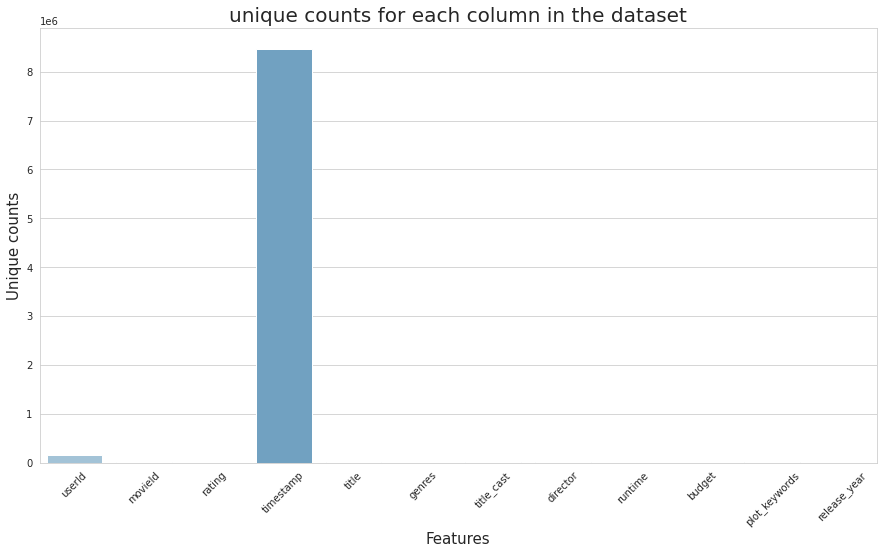

In [ ]:
# obtain unique counts for each column in the dataset

plt.figure(figsize = (15,8))
print(data.nunique(axis=0))
ax = sns.barplot(x=data.columns, y=data.nunique(axis=0), palette='Blues_d')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title('unique counts for each column in the dataset', size=20)
plt.xlabel('Features', size=15)
plt.ylabel('Unique counts', size=15)


**Univariate Analysis**

Univariate analysis — the analysis of one feature at a time — helps us to better understand three questions:

* what are the movies with most reviews?
* who are the users that provide most reviews?
* how does the distribution looks like for ratings?

Text(0, 0.5, 'Frequency')

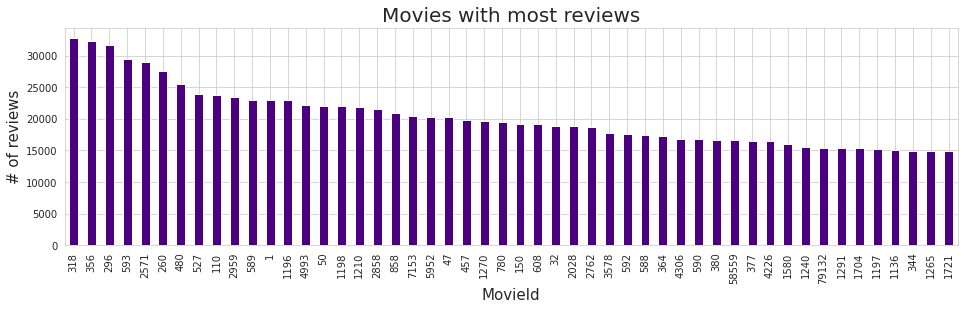

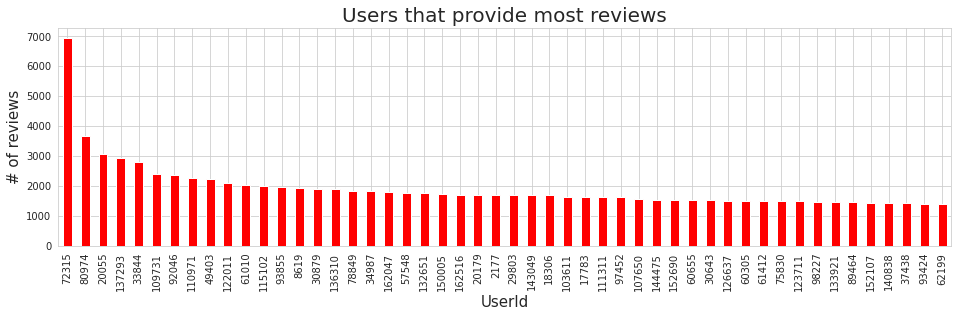

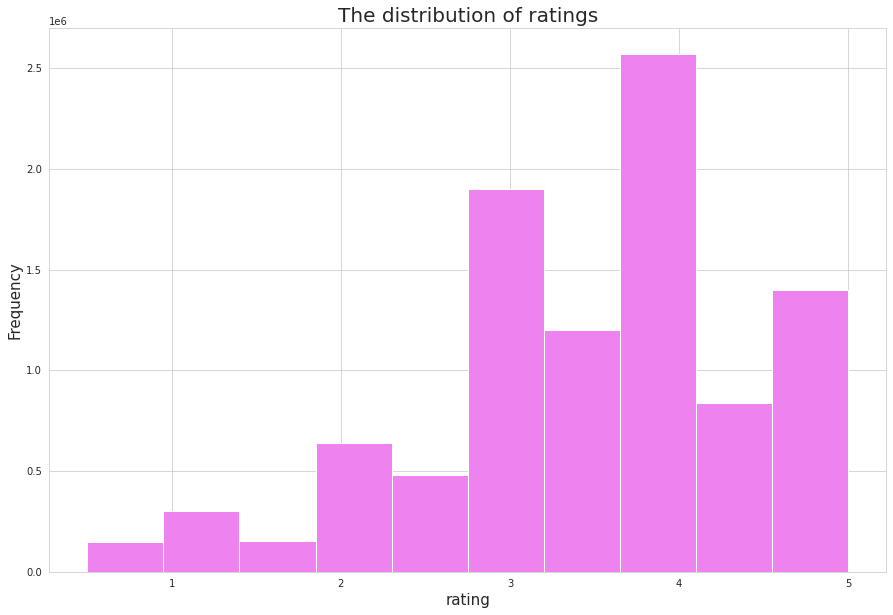

In [ ]:
# univariate analysis
plt.figure(1, figsize = (16,4))
data['movieId'].value_counts()[:50].plot(kind = 'bar', color="indigo") #take top 50 movies
plt.title('Movies with most reviews', size=20)
plt.xlabel('MovieId', size=15)
plt.ylabel('# of reviews', size=15)
plt.figure(2, figsize = (16,4))
data['userId'].value_counts()[:50].plot(kind = 'bar', color="red") #take top 50 users
plt.title('Users that provide most reviews', size=20)
plt.xlabel('UserId', size=15)
plt.ylabel('# of reviews', size=15)
plt.figure(3, figsize = (15,10))
data['rating'].plot(kind = 'hist', color="violet")
plt.title('The distribution of ratings', size=20)
plt.xlabel('rating', size=15)
plt.ylabel('Frequency', size=15)

Let’s create a ratings dataframe with average rating and number of ratings:

In [ ]:
# Calculate mean rating of all movies and check the popular high rating movies
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Wrestling for Jesus: The Tale of T-Money (2011)    5.0
The... Beautiful Country (1977)                    5.0
Only Daughter (2013)                               5.0
Vasermil (2007)                                    5.0
Day the Universe Changed, The (1985)               5.0
Name: rating, dtype: float64

Lets explore the # of people who actually gave ratings to a specific movie in "data".

In [ ]:
# Calculate count rating of all movies
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Shawshank Redemption, The (1994)    32831
Forrest Gump (1994)                 32383
Pulp Fiction (1994)                 31697
Silence of the Lambs, The (1991)    29444
Matrix, The (1999)                  29014
Name: rating, dtype: int64

 Let us create a dataframe with 'rating' count values

In [ ]:
New_data = pd.DataFrame(data.groupby('title')['rating'].mean())
 
New_data['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
 
New_data.head()

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",2.753731,67
$ (Dollars) (1971),2.875000,16
$5 a Day (2008),3.125000,20
$9.99 (2008),3.222222,27
$ellebrity (Sellebrity) (2012),2.250000,2


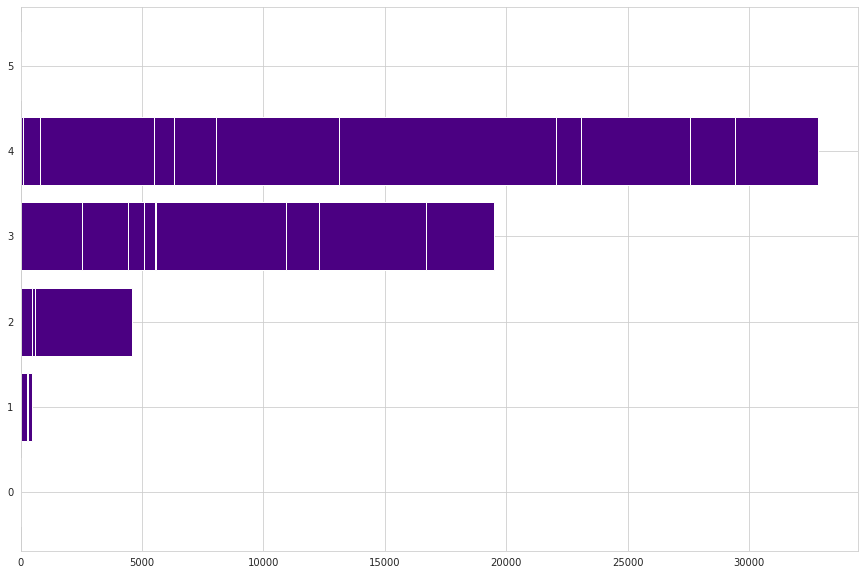

In [ ]:
#plot rounded-up ratings with number of movies
plt.figure(figsize =(15, 10))
ax=plt.barh(New_data['rating'].round(),New_data['num of ratings'],color='indigo')
plt.show()

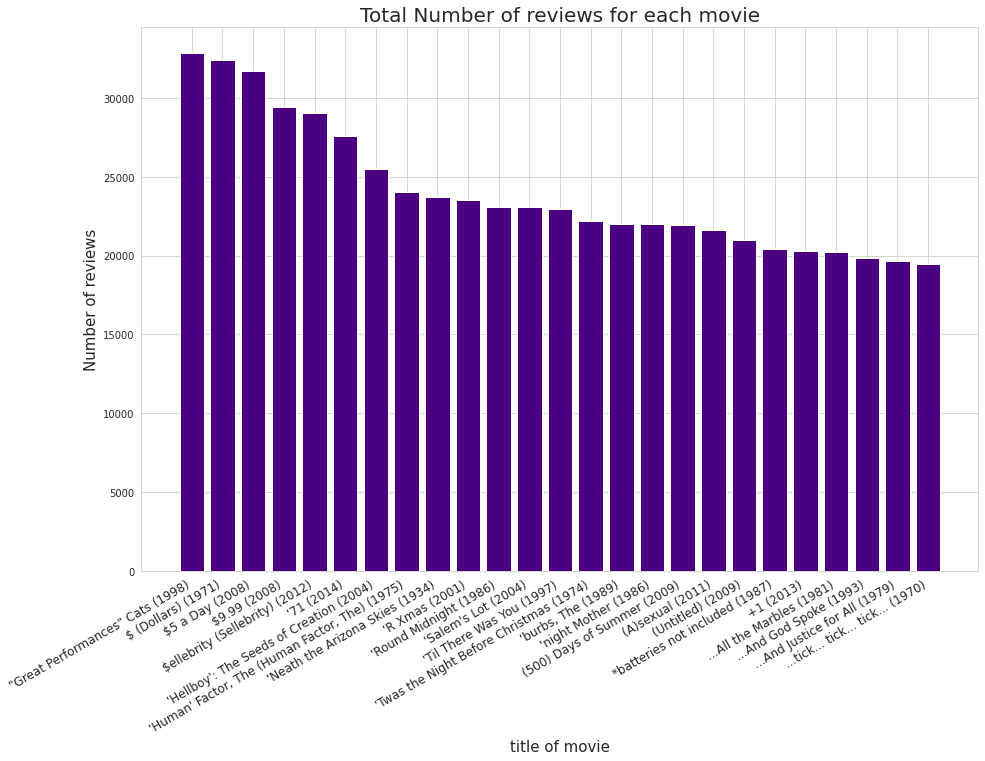

In [ ]:
#a bar graph descibibg number of reviews for first 25 movies
plt.figure(figsize =(15, 10))
ax=plt.subplot()
ax.bar(New_data.head(25).index,New_data['num of ratings'].sort_values(ascending=False).head(25),color='indigo')
ax.set_xticklabels(New_data.index,rotation=30,fontsize='12',horizontalalignment="right")
ax.set_title("Total Number of reviews for each movie", size=20)
plt.xlabel('title of movie', size=15)
plt.ylabel('Number of reviews', size=15)
plt.show()

Let us now explore the bar plot of '# of people rated feature'

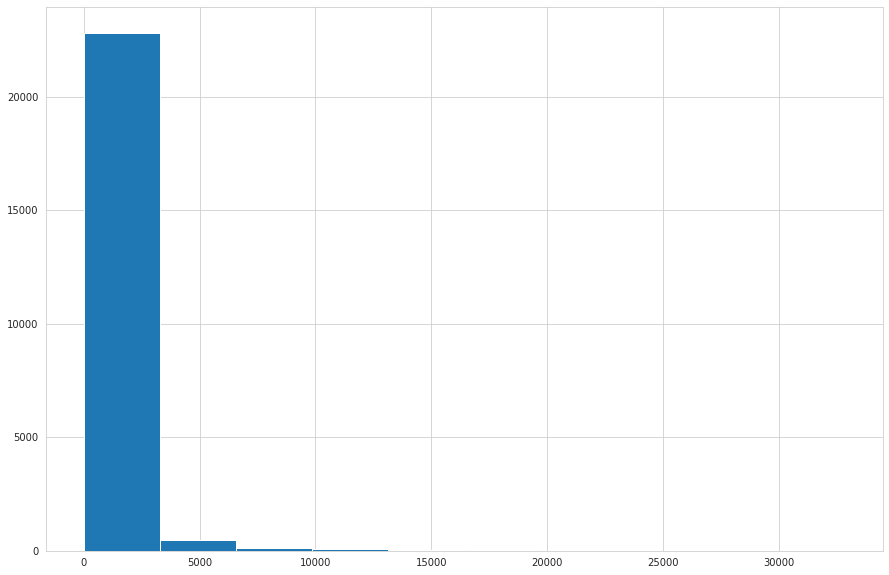

In [ ]:
plt.figure(figsize = (15,10))
New_data['num of ratings'].hist()

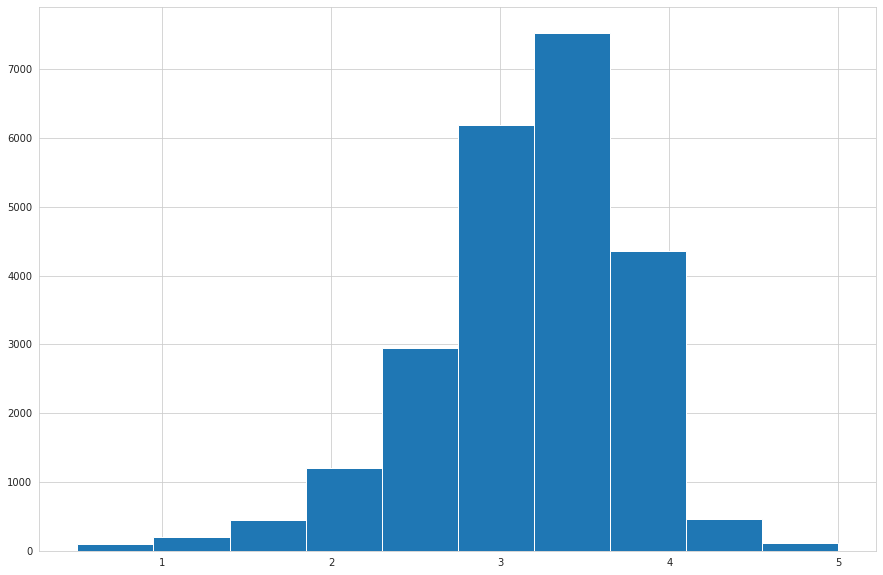

In [ ]:

# plot graph of 'ratings' column
plt.figure(figsize = (15,10))
 
New_data['rating'].hist()

Lets now explore the most rated movie:

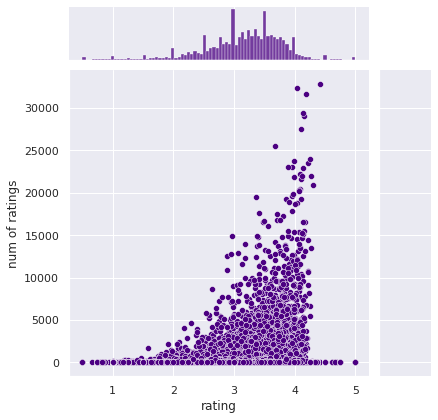

In [ ]:
sns.set(font_scale=1)
sns.jointplot(x=New_data['rating'],y=New_data['num of ratings'], color="indigo");


In the above joinplot it is clearly depicted that the movies with rating range from roughly 2 to 4 has the most number of ratings. Also, movies with about 5 rating has around 1 (No. of people rated) to it.

Lets just plot a Densityplot to have a look at the dense regions.

<Figure size 1080x720 with 0 Axes>

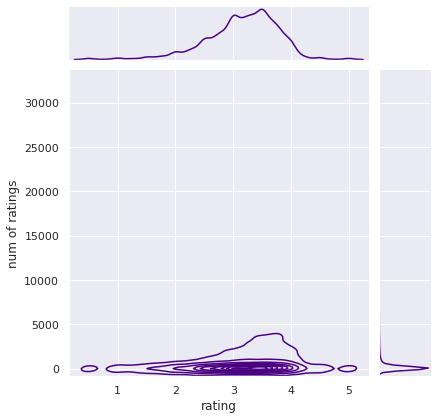

In [ ]:
plt.figure(figsize = (15,10))
sns.jointplot(x=New_data['rating'],y=New_data['num of ratings'],kind='kde', color="indigo");


Notice the dark black zone in the above density plot which represent most no. of datapoints almost have 2 to 4 star ratings. Dark regions generally represent the Dense region, which simply means alot of datapoints at that region.

Now let see the individual distributions of the features.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


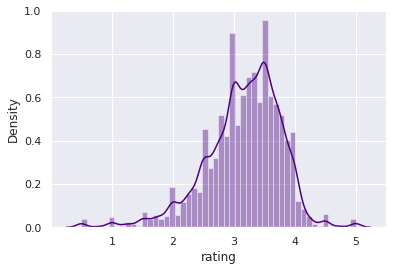

In [ ]:
sns.distplot(New_data['rating'], color="indigo");

It nearly have a Normal distribution with some negative skew

**Visualising the most popular Genres**

In [ ]:
genres = pd.DataFrame(data['genres'].
                      str.split("|").
                      tolist(),
                      index=data['movieId']).stack()
genres = genres.reset_index([0, 'movieId'])
genres.columns = ['movieId', 'Genre']
genres.head()

,movieId,Genre
0,57669,Comedy
1,57669,Crime
2,57669,Drama
3,57669,Thriller
4,57669,Comedy


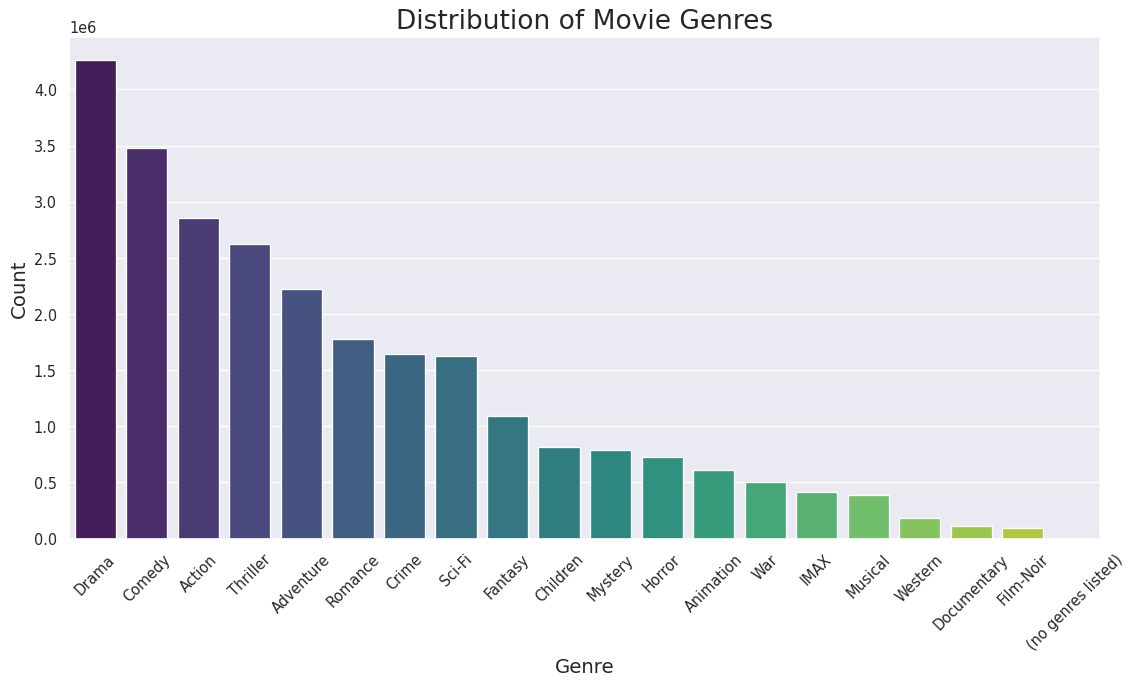

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7) , dpi=95)
sns.countplot(x='Genre',
              data=genres,
              palette='viridis',
              order=genres['Genre'].
              value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Genre', size=15)
plt.ylabel('Count', size=15)
plt.title('Distribution of Movie Genres', size=20)
plt.show()

Movies having the genre as Drama are maximum in number as compared to Film-Noir movies and Documentary movies. A
movie might have multipe genres.

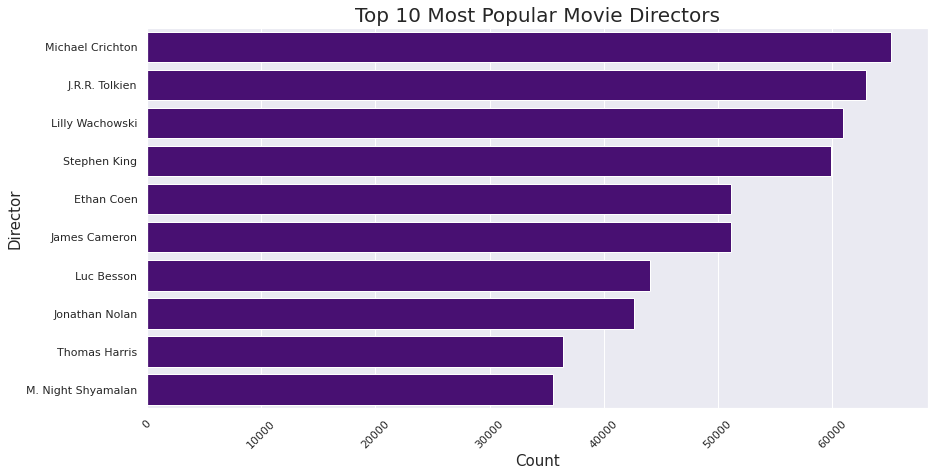

In [ ]:
# Plotting top 10 movie directors using a count-plot
plt.figure(figsize = (14,7))
director=data['director']
axes=sns.countplot(y=director, order = director.value_counts().index[1:11],color='indigo')
axes.set_title('Top 10 Most Popular Movie Directors',fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Count', size=15)
plt.ylabel('Director', size=15)
plt.show()

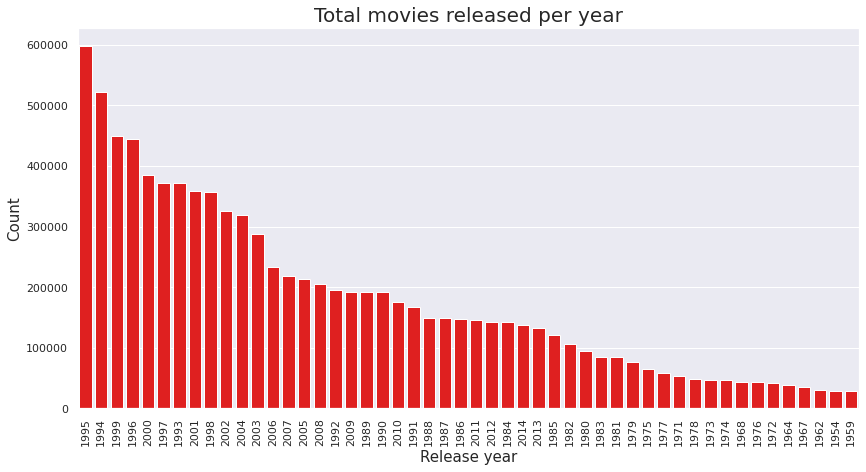

In [ ]:
# Plotting total amount of movies released in each year using a count plot.
figure= plt.subplots(figsize=(14, 7))
axes=sns.countplot(x=data['release_year'], order = data['release_year'].value_counts()[0:50].index,color='red')
axes.set_title('Total movies released per year',fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('Count', size=15)
plt.xlabel('Release year', size=15)
plt.show()



*   List item
*   List item



Text(-61.75, 0.5, 'Unique counts')

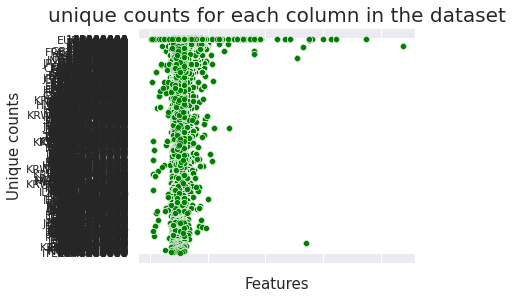

In [ ]:
ax = sns.scatterplot(data=data, x="runtime", y="budget", color="green")
ax.set_xticklabels(ax.get_yticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('unique counts for each column in the dataset', size=20)
plt.xlabel('Features', size=15)
plt.ylabel('Unique counts', size=15)



<a id="seven"></a>
# 7. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section the data is processed further, creating new features - as identified in the EDA phase. |

---

<a id="eight"></a>
# 8. Model Creation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, NLP models are created inorder to accurately predict the sentiment of tweets. |

---

<a id="nine"></a>
# 9.  Model Improvements
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="ten"></a>
# 10.  Model Evaluation |
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="eleven"></a>
# 11. Discuss chosen methods logic
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="twelve"></a>
# 12. Conclusions
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

* Balanced data significantly improved model performance.
* Support vector machines achieved the highest F1 test score, Hence Support vector machines was the best performing model.
* This conclusion is supported by literature which states that SVM's are known to be one of the best supervised learning models for text classification problems.


<a id="thirteen"></a>
# 13. Recommendations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

# Submission file